In [1]:
#importing files
import pandas as pd 
df_P = pd.read_csv('Period.csv',encoding="utf-8")
df_S = pd.read_csv('Symptom.csv', encoding="utf-8")
df_U = pd.read_csv('User.csv', encoding="utf-8")

In [2]:
df_P.head()

,start_date,end_date,id
0,5/4/2015,10/4/2015,252.0
1,23/3/15,27/3/15,253.0
2,6/4/2015,11/4/2015,254.0
3,21/3/15,24/3/15,255.0
4,26/3/15,31/3/15,256.0


In [3]:
df_U.head()

,id,dob,cycle_length_initial,period_length_initial
0,252,NaN,28,6
1,253,NaN,30,5
2,254,NaN,28,6
3,255,NaN,30,4
4,256,NaN,25,6


In [4]:
#Merge User and Period files based on user id
df_UP = pd.merge(df_U, df_P, on='id')

In [5]:
#drops dob
df_UP=df_UP.drop(columns=['dob'])

In [42]:
df_UP.head()

,id,cycle_length_initial,period_length_initial,start_date,end_date
0,252,28,6,5/4/2015,10/4/2015
1,253,30,5,23/3/15,27/3/15
2,254,28,6,6/4/2015,11/4/2015
3,254,28,6,4/10/2015,NaN
4,254,28,6,1/1/2016,NaN


In [51]:
#function to find absolute difference in date
from datetime import date

def days_between(d1,d2):
    if(len(d1[2]) == 2):
        d1[2] = int(d1[2]) + 2000;
    if(len(d2[2]) == 2):
        d2[2] = int(d2[2]) + 2000;    
    #format(d1[2],"%Y")
    #format(d2[2],"%Y")
    dt1 = date(int(d1[2]),int(d1[1]),int(d1[0]))
    dt2 = date(int(d2[2]),int(d2[1]),int(d2[0]))
    return abs((dt2 - dt1).days)+1

In [52]:
#iterates the df to re-measure period_length_initial based on start date and end date
for index, row in df_UP.iterrows():
   if(not pd.isnull(row['start_date']) and not pd.isnull(row['end_date'])):
       strt_date = row['start_date'].split('/')
       end_date = row['end_date'].split('/')
       df_UP['period_length_initial'][index] = days_between(strt_date,end_date)
       #print(row[‘period_length_initial’])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [65]:
#drops rows with period length greater than 12
l = df_UP[df_UP['period_length_initial']>=12]
l.index
df_UP=df_UP.drop(l.index)

In [68]:
df_UP[df_UP['period_length_initial']>=10]

,id,cycle_length_initial,period_length_initial,start_date,end_date
37,269,28,10,5/11/2016,27/10/16
150,311,30,10,22/10/16,31/10/16
173,317,31,10,21/3/15,30/3/15
266,351,28,11,18/10/15,28/10/15
384,416,33,10,25/8/18,3/9/2018
533,454,28,10,17/7/17,26/7/17
550,454,28,10,22/11/18,1/12/2018
764,490,28,11,17/12/15,27/12/15
973,526,28,10,5/5/2018,14/5/18
1010,537,28,10,29/11/15,8/12/2015


In [69]:
#Merges df with Symptoms data based on user id
df_UPS = pd.merge(df_UP, df_S, on='id')

In [70]:
#formats the date as 29/2/16 gives error 
for index, row in df_UPS.iterrows():
  if(not pd.isnull(row['start_date']) and not pd.isnull(row['date'])):
    if(row['start_date'] == '29/2/16'):
      df_UPS['start_date'][index] = '28/2/16'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [71]:
#list of indexes of users having difference in start-date and date of symptoms more than 15 days as they are not relevant to the period
l = []
for index, row in df_UPS.iterrows():
  if(not pd.isnull(row['start_date']) and not pd.isnull(row['date'])):
    strt_date = row['start_date'].split('/')
    end_date = row['date'].split('/')
    if(days_between(strt_date,end_date)>15):
      l.append(index)    

In [72]:
#drops the list of indexes
df_UPS.drop(l,inplace=True)

In [73]:
df_UPS.head()

,id,cycle_length_initial,period_length_initial,start_date,end_date,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,252,28,6,5/4/2015,10/4/2015,0,0,0,0,0,0,0,0,0,0,11/4/2015
1,252,28,6,5/4/2015,10/4/2015,50,50,0,0,0,0,0,0,0,0,13/4/15
2,252,28,6,5/4/2015,10/4/2015,0,0,0,0,0,0,0,0,0,0,17/4/15
3,254,28,6,6/4/2015,11/4/2015,0,0,0,0,0,0,0,0,0,0,12/4/2015
15,257,30,5,11/4/2015,15/4/15,0,0,0,46,0,0,0,0,0,0,10/4/2015


In [74]:
#resets indexes
df_UPS.reset_index(inplace = True) 

In [75]:
df_UPS[0:10]

,index,id,cycle_length_initial,period_length_initial,start_date,end_date,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,0,252,28,6,5/4/2015,10/4/2015,0,0,0,0,0,0,0,0,0,0,11/4/2015
1,1,252,28,6,5/4/2015,10/4/2015,50,50,0,0,0,0,0,0,0,0,13/4/15
2,2,252,28,6,5/4/2015,10/4/2015,0,0,0,0,0,0,0,0,0,0,17/4/15
3,3,254,28,6,6/4/2015,11/4/2015,0,0,0,0,0,0,0,0,0,0,12/4/2015
4,15,257,30,5,11/4/2015,15/4/15,0,0,0,46,0,0,0,0,0,0,10/4/2015
5,16,257,30,5,11/4/2015,15/4/15,0,0,0,0,0,27,48,0,0,0,11/4/2015
6,17,257,30,5,11/4/2015,15/4/15,0,0,0,0,0,0,47,0,0,0,12/4/2015
7,22,262,28,5,12/4/2015,16/4/15,71,0,45,0,0,0,0,53,0,0,12/4/2015
8,23,262,28,5,12/4/2015,16/4/15,43,0,0,0,0,34,0,0,0,0,13/4/15
9,24,262,28,5,12/4/2015,16/4/15,39,0,0,0,0,0,0,0,0,0,16/4/15


In [76]:
#drops the column with old indexes
df_UPS=df_UPS.drop('index', axis=1)

In [77]:
#list of user id
lst = df_UPS['id'].unique()
lst

array([ 252,  254,  257, ..., 7050, 7051, 7054], dtype=int64)

In [80]:
#Updates cycle_length_initial for each user id based on same users previous start date and current start date if less than 40
for n in lst:
  d = df_UPS.loc[df_UPS['id'] == n]
  first = True
  i = 0
  for index, row in d.iterrows():
    if(first == False):
      if((not pd.isnull(d['start_date'][index]) and not pd.isnull(d['start_date'][i])) and (d['start_date'][index] != d['start_date'][i])):
        strt_date = d['start_date'][index].split('/')
        end_date =d['start_date'][i].split('/')
        result = days_between(strt_date,end_date)
        if(result<=40):
          df_UPS['cycle_length_initial'][index] = result
        i = index
    else:
      first=False
      i=index  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [81]:
df_UPS.head()

,id,cycle_length_initial,period_length_initial,start_date,end_date,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,252,28,6,5/4/2015,10/4/2015,0,0,0,0,0,0,0,0,0,0,11/4/2015
1,252,28,6,5/4/2015,10/4/2015,50,50,0,0,0,0,0,0,0,0,13/4/15
2,252,28,6,5/4/2015,10/4/2015,0,0,0,0,0,0,0,0,0,0,17/4/15
3,254,28,6,6/4/2015,11/4/2015,0,0,0,0,0,0,0,0,0,0,12/4/2015
4,257,30,5,11/4/2015,15/4/15,0,0,0,46,0,0,0,0,0,0,10/4/2015


In [83]:
#creates new columns
df_UPS['Premenstrual'] = 0
df_UPS['Menstrual'] = 0
df_UPS['Postmenstrual'] = 0

In [85]:
df_UPS

,id,cycle_length_initial,period_length_initial,start_date,end_date,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date,Premenstrual,Menstrual,Postmenstrual
0,252,28,6,5/4/2015,10/4/2015,0,0,0,0,0,0,0,0,0,0,11/4/2015,0,0,0
1,252,28,6,5/4/2015,10/4/2015,50,50,0,0,0,0,0,0,0,0,13/4/15,0,0,0
2,252,28,6,5/4/2015,10/4/2015,0,0,0,0,0,0,0,0,0,0,17/4/15,0,0,0
3,254,28,6,6/4/2015,11/4/2015,0,0,0,0,0,0,0,0,0,0,12/4/2015,0,0,0
4,257,30,5,11/4/2015,15/4/15,0,0,0,46,0,0,0,0,0,0,10/4/2015,0,0,0
5,257,30,5,11/4/2015,15/4/15,0,0,0,0,0,27,48,0,0,0,11/4/2015,0,0,0
6,257,30,5,11/4/2015,15/4/15,0,0,0,0,0,0,47,0,0,0,12/4/2015,0,0,0
7,262,28,5,12/4/2015,16/4/15,71,0,45,0,0,0,0,53,0,0,12/4/2015,0,0,0
8,262,28,5,12/4/2015,16/4/15,43,0,0,0,0,34,0,0,0,0,13/4/15,0,0,0
9,262,28,5,12/4/2015,16/4/15,39,0,0,0,0,0,0,0,0,0,16/4/15,0,0,0


In [86]:
#finds the exact difference in two dates
def days_diff(d1,d2):
    if(len(d1[2]) == 2):
        d1[2] = int(d1[2]) + 2000;
    if(len(d2[2]) == 2):
        d2[2] = int(d2[2]) + 2000;    
    dt1 = date(int(d1[2]),int(d1[1]),int(d1[0]))
    dt2 = date(int(d2[2]),int(d2[1]),int(d2[0]))
    return ((dt2 - dt1).days)+1


In [87]:
#Updates values in cloumns: if all symptoms 0 then all new columns are set to 0, if before period start date then premenstrual is 1,
#if within days of period then menstrual is set to 1 and if after period days is set to 1
for index, row in df_UPS.iterrows():  
    if((df_UPS['acne'][index] == 0) and (df_UPS['backache'][index] == 0) and (df_UPS['bloating'][index] == 0) and (df_UPS['cramp'][index] == 0) and (df_UPS['diarrhea'][index] == 0) and (df_UPS['dizzy'][index] == 0) and (df_UPS['headache'][index] == 0) and (df_UPS['mood'][index] == 0) and (df_UPS['nausea'][index] == 0) and (df_UPS['sore'][index] == 0)):
      i=0   
    else: 
      if((not pd.isnull(df_UPS['start_date'][index]) and not pd.isnull(df_UPS['date'][index]))):
        strt_date = df_UPS['start_date'][index].split('/')
        end_date =df_UPS['date'][index].split('/')
        diff=days_diff(strt_date,end_date)
        if(diff<0):
          df_UPS['Premenstrual'][index] = 1
        elif(diff<=df_UPS['period_length_initial'][index]):
          df_UPS['Menstrual'][index] = 1
        else:
          df_UPS['Postmenstrual'][index] = 1      

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [88]:
df_UPS.head()

,id,cycle_length_initial,period_length_initial,start_date,end_date,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date,Premenstrual,Menstrual,Postmenstrual
0,252,28,6,5/4/2015,10/4/2015,0,0,0,0,0,0,0,0,0,0,11/4/2015,0,0,0
1,252,28,6,5/4/2015,10/4/2015,50,50,0,0,0,0,0,0,0,0,13/4/15,0,0,1
2,252,28,6,5/4/2015,10/4/2015,0,0,0,0,0,0,0,0,0,0,17/4/15,0,0,0
3,254,28,6,6/4/2015,11/4/2015,0,0,0,0,0,0,0,0,0,0,12/4/2015,0,0,0
4,257,30,5,11/4/2015,15/4/15,0,0,0,46,0,0,0,0,0,0,10/4/2015,0,1,0


In [204]:
#new data frame for final processing
df_final = df_UPS

In [205]:
#drops the dates and id
df_final = df_UPS.drop(df_UPS.columns[[0,3,4,15]], axis=1)

In [206]:
df_final.head()

,cycle_length_initial,period_length_initial,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,Premenstrual,Menstrual,Postmenstrual
0,28,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,28,6,50,50,0,0,0,0,0,0,0,0,0,0,1
2,28,6,0,0,0,0,0,0,0,0,0,0,0,0,0
3,28,6,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30,5,0,0,0,46,0,0,0,0,0,0,0,1,0


In [207]:
#sets symptoms to 0 or 1
for index, row in df_final.iterrows():
    if(row.acne > 0):
        df_final['acne'][index]=1
    if(row.backache > 0):
        df_final['backache'][index]=1
    if(row.bloating > 0):
        df_final['bloating'][index]=1
    if(row.cramp > 0):
        df_final['cramp'][index]=1
    if(row.diarrhea > 0):
        df_final['diarrhea'][index]=1
    if(row.dizzy > 0):
        df_final['dizzy'][index]=1
    if(row.headache > 0):
        df_final['headache'][index]=1
    if(row.mood > 0):
        df_final['mood'][index]=1
    if(row.nausea > 0):
        df_final['nausea'][index]=1
    if(row.sore > 0):
        df_final['sore'][index]=1    
        

In [191]:
#normalize_numeric_minmax(df_final,'period_length_initial')
#normalize_numeric_minmax(df_final,'cycle_length_initial')
normalize_numeric_minmax(df_final,'acne')
normalize_numeric_minmax(df_final,'backache')
normalize_numeric_minmax(df_final,'bloating')
normalize_numeric_minmax(df_final,'cramp')
normalize_numeric_minmax(df_final,'diarrhea')
normalize_numeric_minmax(df_final,'dizzy')
normalize_numeric_minmax(df_final,'headache')
normalize_numeric_minmax(df_final,'mood')
normalize_numeric_minmax(df_final,'nausea')
normalize_numeric_minmax(df_final,'sore')

In [208]:
#Function to normalize columns
def normalize_numeric_minmax(df, name):
   if(df[name].max() > 0):
       df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)
   else:
       df[name] = df[name].astype(np.float32)
      
def encode_text_dummy(df, name):
   dummies = pd.get_dummies(df[name])
   for x in dummies.columns:
       dummy_name = "{}-{}".format(name, x)
       df[dummy_name] = dummies[x]
   df.drop(name, axis=1, inplace=True)      

In [209]:
#drops rows with cycle less than 20
l = df_final[df_final['cycle_length_initial']<20]
df_final.drop(l.index, inplace=True)

In [210]:
#converts x to numpy array
x=df_final.drop('cycle_length_initial', axis=1)
columns = ['acne','backache','bloating','cramp','diarrhea','dizzy','headache','mood','nausea','sore','cycle_length_initial','Premenstrual','Menstrual','Postmenstrual']
x=x.as_matrix(columns =columns)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [211]:
#converts y to numpy array
y=df_final['cycle_length_initial'].values
y

array([28, 28, 28, ..., 28, 28, 28], dtype=int64)

In [212]:
#Linear Regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

XTrain, XTest, YTrain, YTest = train_test_split(x, y, test_size=0.2, random_state=42)

regr = linear_model.LinearRegression()
regr.fit(XTrain, YTrain)
liReg_pred = regr.predict(XTest)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(YTest, liReg_pred))
print('Variance score: %.2f' % r2_score(YTest, liReg_pred))

Coefficients: 
 [ 0.22852567  0.07117062 -0.14833633  0.26184606  0.12323739 -0.22887681
 -0.23964553  0.22196017  0.28115783 -0.07243843  0.02608327  0.10001381
 -0.35623093]
Mean squared error: 8.24
Variance score: 0.00


In [213]:
from sklearn import preprocessing
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

In [214]:
cycle=encode_text_index(df_final,"cycle_length_initial")   # label encoding

In [215]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Final accuracy: 0.48493723849372383
Plotting confusion matrix


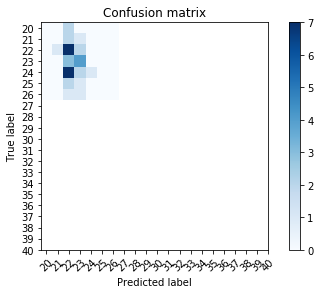

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00         4
          3       0.00      0.00      0.00         7
          4       0.00      0.00      0.00         7
          5       0.00      0.00      0.00       204
          6       0.00      0.00      0.00       132
          7       0.00      0.00      0.00        92
          8       0.48      1.00      0.65      1159
          9       0.00      0.00      0.00       136
         10       0.00      0.00      0.00       268
         11       0.00      0.00      0.00        93
         12       0.00      0.00      0.00        64
         13       0.00      0.00      0.00        44
         14       0.00      0.00      0.00        25
         15       0.00      0.00      0.00        45
         16       0.00      0.00      0.00        25
         17       0.00      0.00      0.00   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [216]:
#Logistic Reg
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=42)
# import the class
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_Train, Y_Train)

# predict the response for new observations
logreg_pred = logreg.predict(X_Test)

#accuracy
score = metrics.accuracy_score(Y_Test, logreg_pred)
print("Final accuracy: {}".format(score))

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, cycle)
plt.show()

print(metrics.classification_report(Y_Test, logreg_pred))

Final accuracy: 0.48493723849372383
Plotting confusion matrix


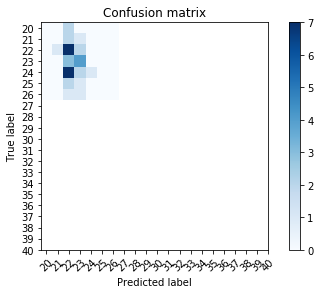

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00         4
          3       0.00      0.00      0.00         7
          4       0.00      0.00      0.00         7
          5       0.00      0.00      0.00       204
          6       0.00      0.00      0.00       132
          7       0.00      0.00      0.00        92
          8       0.48      1.00      0.65      1159
          9       0.00      0.00      0.00       136
         10       0.00      0.00      0.00       268
         11       0.00      0.00      0.00        93
         12       0.00      0.00      0.00        64
         13       0.00      0.00      0.00        44
         14       0.00      0.00      0.00        25
         15       0.00      0.00      0.00        45
         16       0.00      0.00      0.00        25
         17       0.00      0.00      0.00   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [217]:
#SVM

from sklearn.svm import SVC
import sklearn.metrics as metrics

clf = SVC(kernel='linear')
clf.fit(X_Train, Y_Train)

svm_pred = clf.predict(X_Test)

#accuracy
score = metrics.accuracy_score(Y_Test, svm_pred)
print("Final accuracy: {}".format(score))

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, cycle)
plt.show()

print(metrics.classification_report(Y_Test, svm_pred))

Final accuracy: 0.48493723849372383
Plotting confusion matrix


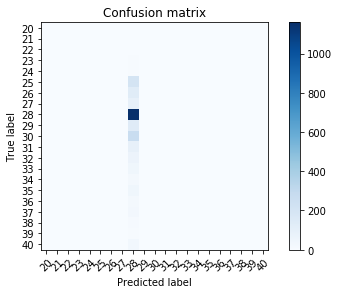

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00         4
          3       0.00      0.00      0.00         7
          4       0.00      0.00      0.00         7
          5       0.00      0.00      0.00       204
          6       0.00      0.00      0.00       132
          7       0.00      0.00      0.00        92
          8       0.48      1.00      0.65      1159
          9       0.00      0.00      0.00       136
         10       0.00      0.00      0.00       268
         11       0.00      0.00      0.00        93
         12       0.00      0.00      0.00        64
         13       0.00      0.00      0.00        44
         14       0.00      0.00      0.00        25
         15       0.00      0.00      0.00        45
         16       0.00      0.00      0.00        25
         17       0.00      0.00      0.00   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [219]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
clf = MultinomialNB()
clf.fit(X_Train, Y_Train)
mnb_pred = clf.predict(X_Test)

#accuracy
score = metrics.accuracy_score(Y_Test, mnb_pred)
print("Final accuracy: {}".format(score))

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, cycle)
plt.show()

print(metrics.classification_report(Y_Test, mnb_pred))

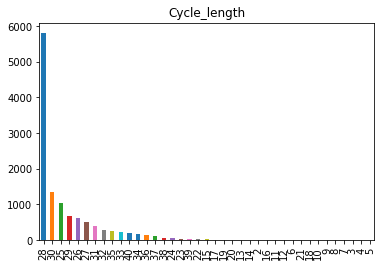

In [220]:
target_count = df_UPS.cycle_length_initial.value_counts()
target_count.plot(kind='bar', title='Cycle_length');